In [1]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

<Axes: xlabel='n'>

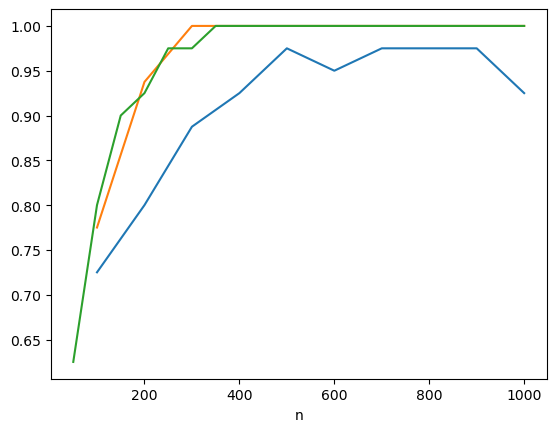

In [7]:
ising = pd.read_csv('ising_supplement-2.csv')

ising.groupby('n')['SCOPE_accuracy'].median().plot()
ising = pd.read_csv('ising_supplement-3.csv')

ising.groupby('n')['SCOPE_accuracy'].median().plot()
#ising.groupby('n')['SCOPE_accuracy'].mean().plot()
#ising.groupby('n')['SCOPE_accuracy'].std().plot()
ising2 = pd.read_csv('../total_experiment/results/ising_experiment.csv')
ising2.groupby('n')['SCOPE_accuracy'].median().plot()
#ising2.groupby('n')['SCOPE_accuracy'].mean().plot()
#ising2.groupby('n')['SCOPE_accuracy'].std().plot()


n
100     1.514111
200     0.653077
300     0.268480
400     0.188309
500     0.159708
600     0.159940
700     0.170765
800     0.200795
900     0.291969
1000    0.290449
Name: IHT, dtype: float64

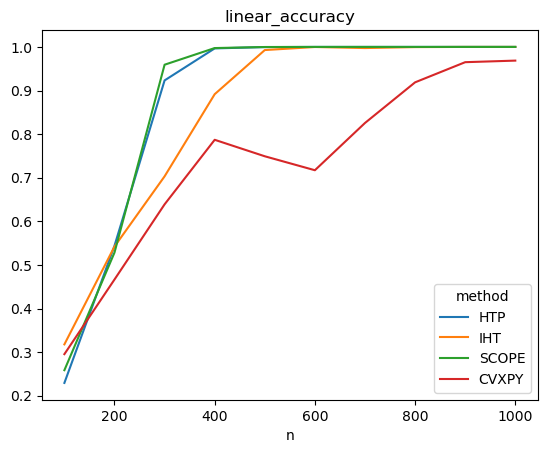

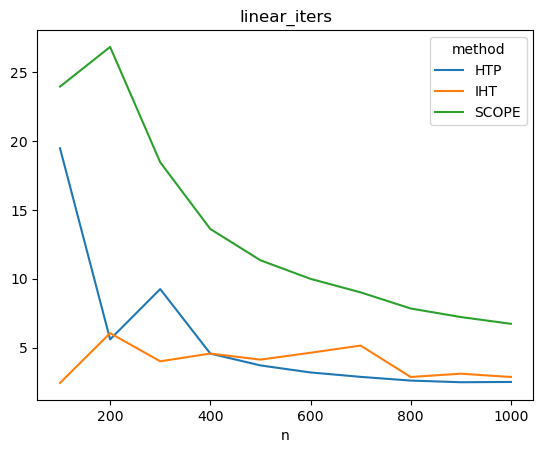

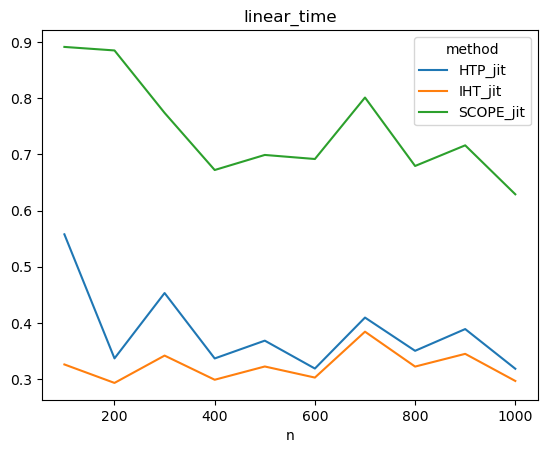

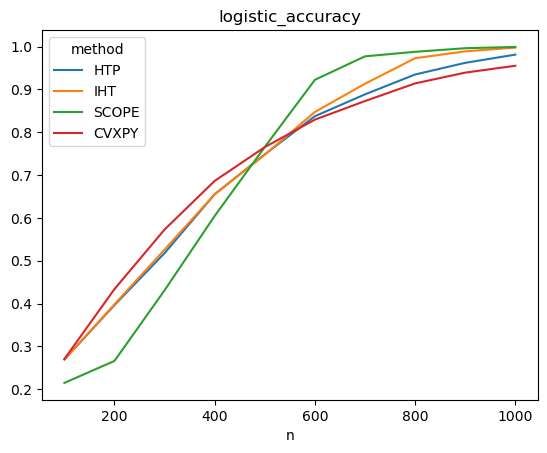

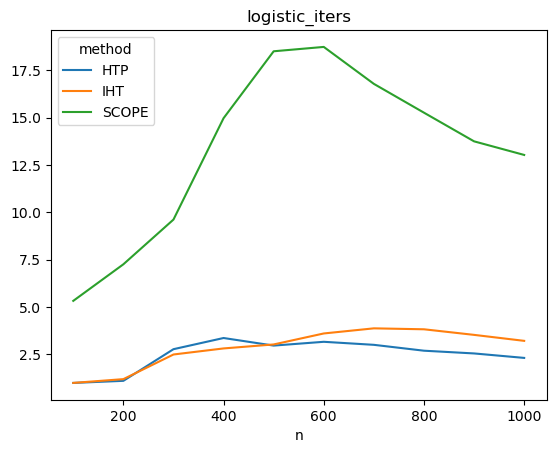

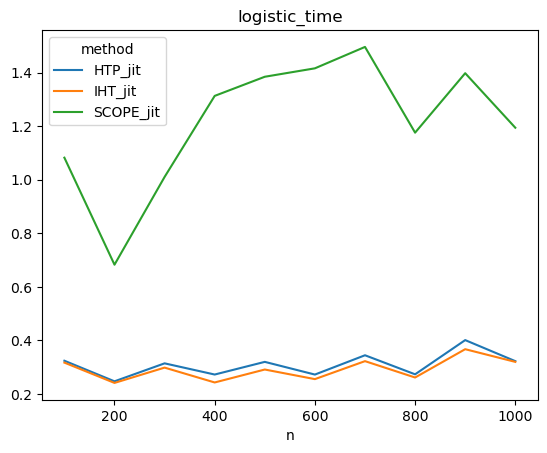

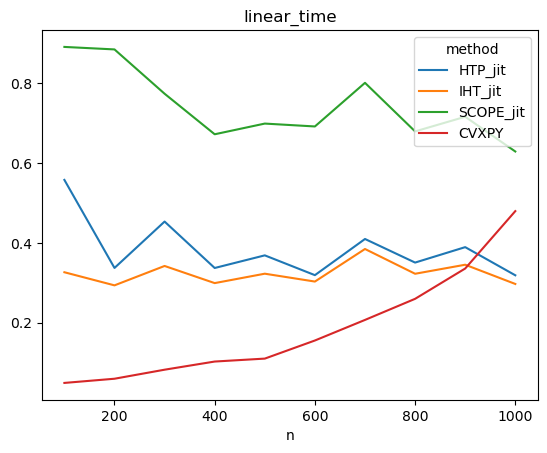

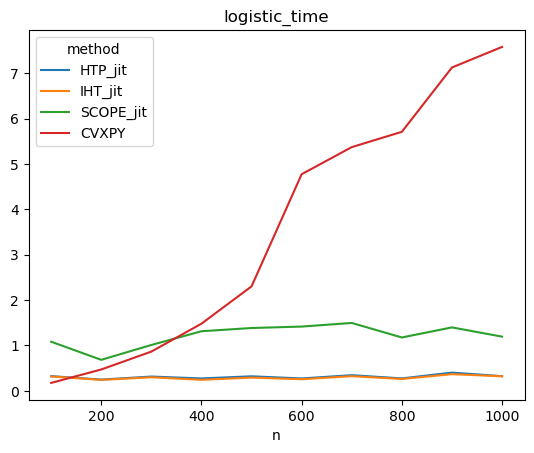

In [22]:
df = pd.read_csv('linear-logistic-2.csv').dropna()
linear = df.loc[df.model == 'linear']
logistic = df.loc[df.model == 'logistic']

linear_accuracy = linear.groupby(['n', 'method'])['accuracy'].mean().unstack()
linear_iters = linear.groupby(['n', 'method'])['n_iters'].mean().unstack()
linear_time = linear.groupby(['n', 'method'])['time'].mean().unstack()

logistic_accuracy = logistic.groupby(['n', 'method'])['accuracy'].mean().unstack()
logistic_iters = logistic.groupby(['n', 'method'])['n_iters'].mean().unstack()
logistic_time = logistic.groupby(['n', 'method'])['time'].mean().unstack()

linear_accuracy[["HTP", "IHT", "SCOPE", "CVXPY"]].plot(kind='line', title='linear_accuracy')
linear_iters[["HTP", "IHT", "SCOPE"]].plot(kind='line', title='linear_iters')
linear_time[["HTP_jit", "IHT_jit", "SCOPE_jit"]].plot(kind='line', title='linear_time')
logistic_accuracy[["HTP", "IHT", "SCOPE", "CVXPY"]].plot(kind='line', title='logistic_accuracy')
logistic_iters[["HTP", "IHT", "SCOPE"]].plot(kind='line', title='logistic_iters')
logistic_time[["HTP_jit", "IHT_jit", "SCOPE_jit"]].plot(kind='line', title='logistic_time')

linear_time[["HTP_jit", "IHT_jit", "SCOPE_jit", "CVXPY"]].plot(kind='line', title='linear_time')
logistic_time[["HTP_jit", "IHT_jit", "SCOPE_jit", "CVXPY"]].plot(kind='line', title='logistic_time')

/tmp/ipykernel_1559441/3349338665.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['method'] = df_temp['method'].apply(lambda x: x.replace('_jit', ''))
/tmp/ipykernel_1559441/3349338665.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['method'] = df_temp['method'].apply(lambda x: x.replace('_jit', ''))
/tmp/ipykernel_1559441/3349338665.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instea

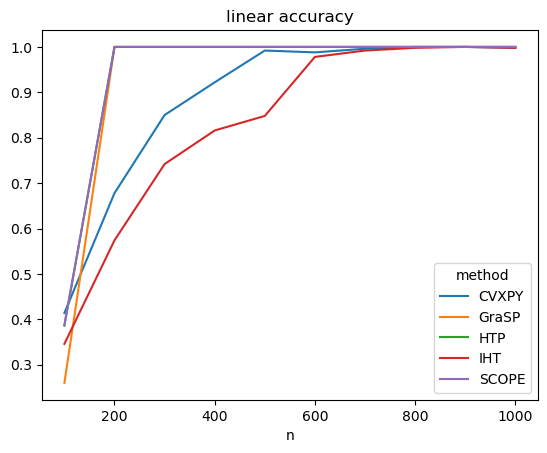

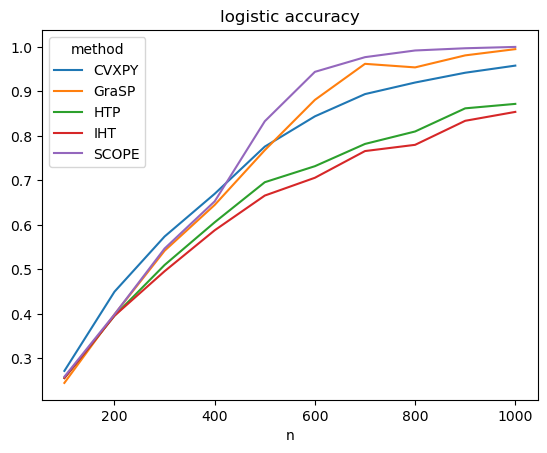

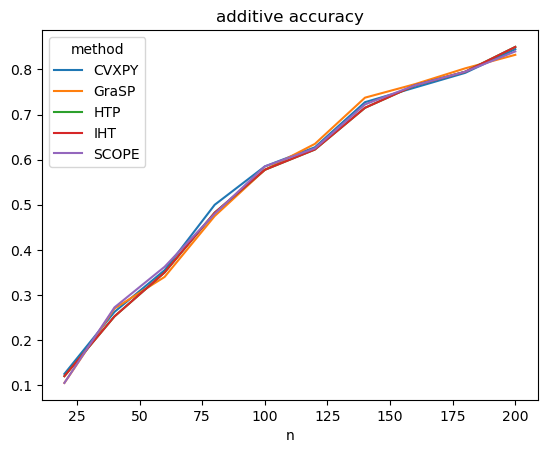

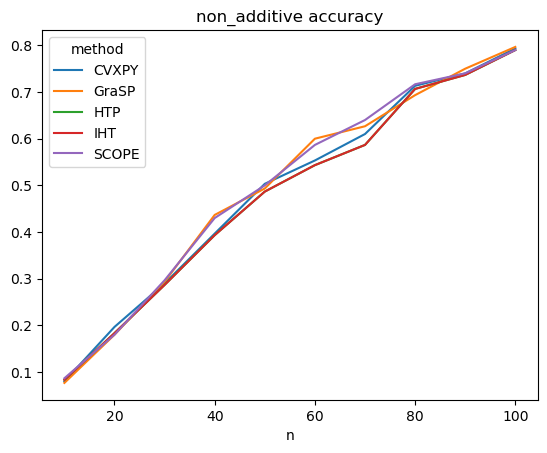

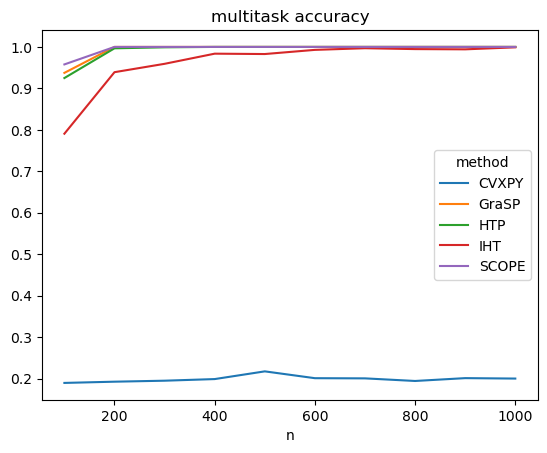

In [3]:
# accuracy
for model in ['linear', 'logistic', 'additive', 'non_additive', 'multitask']:
    df_temp = df[(df['model'] == model)]
    df_temp['method'] = df_temp['method'].apply(lambda x: x.replace('_jit', ''))
    df_group = df_temp.groupby(['n', 'method'])['accuracy'].mean().unstack()
    df_group.plot(kind='line', title=model + ' accuracy')


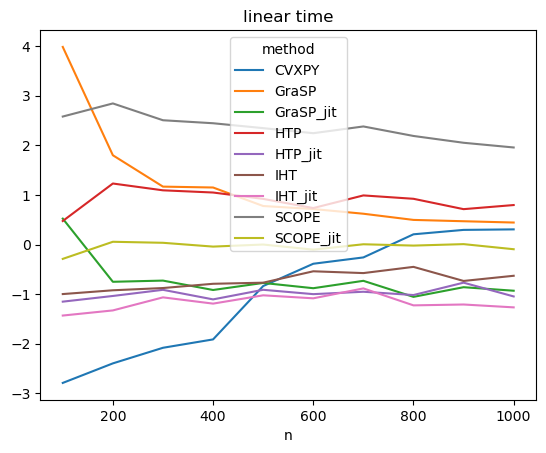

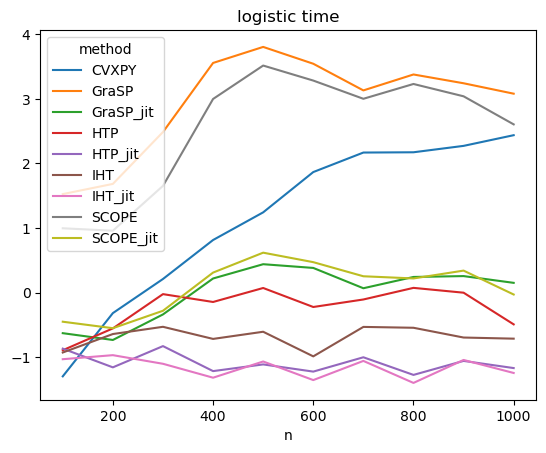

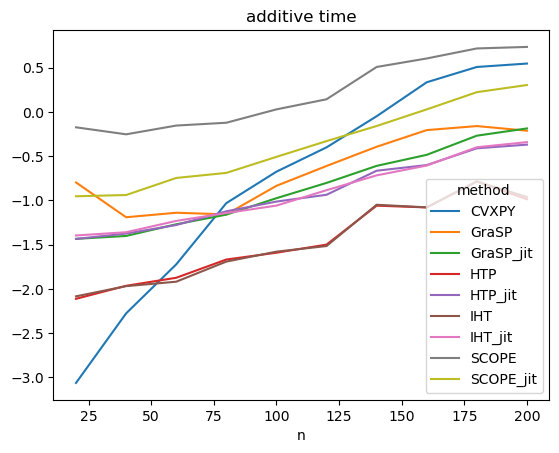

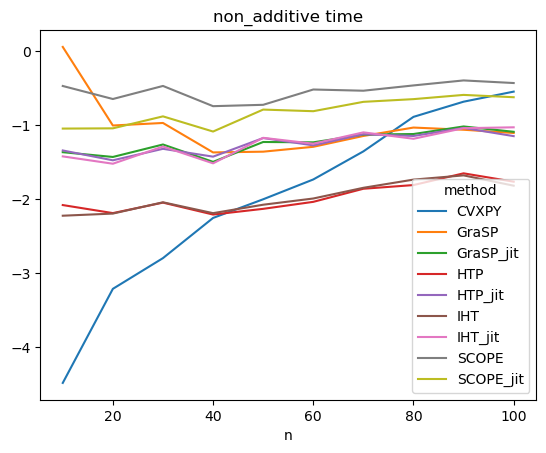

In [27]:
for model in ['linear', 'logistic', 'additive', 'non_additive']:
    df_temp = df[(df['model'] == model) & (df['time'] < 1000)]
    #df_temp['method'] = df_temp['method'].apply(lambda x: x.replace('_jit', ''))
    df_group = df_temp.groupby(['n', 'method'])['time'].mean().apply(lambda x: np.log(x)).unstack()
    df_group.plot(kind='line', title=model + ' time')

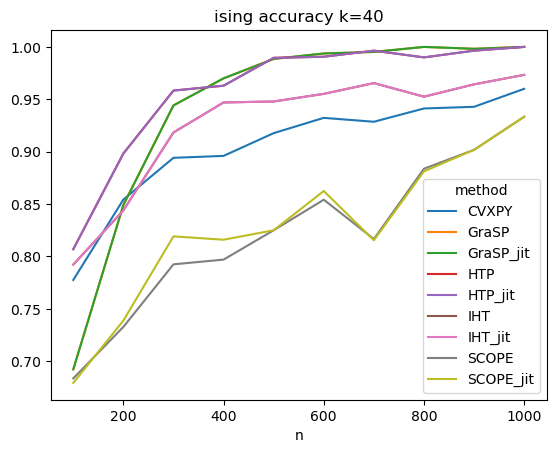

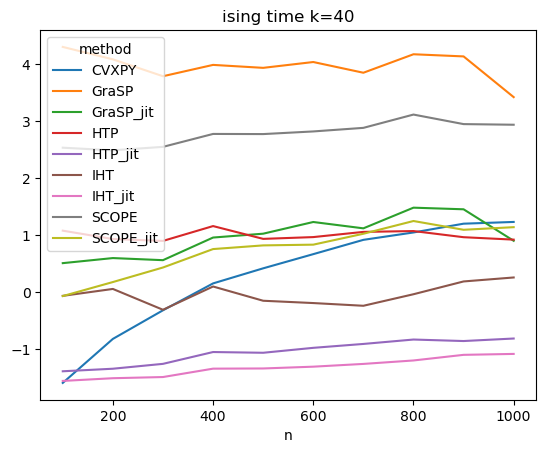

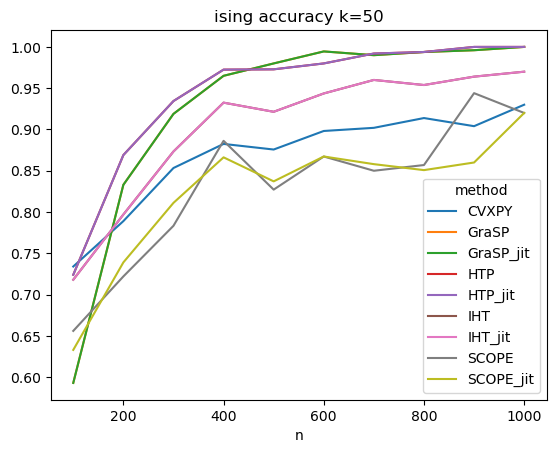

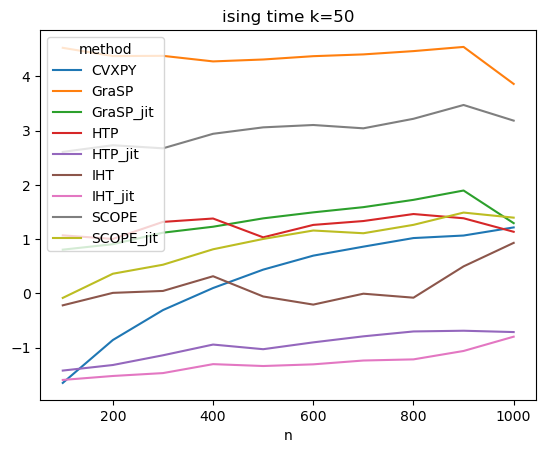

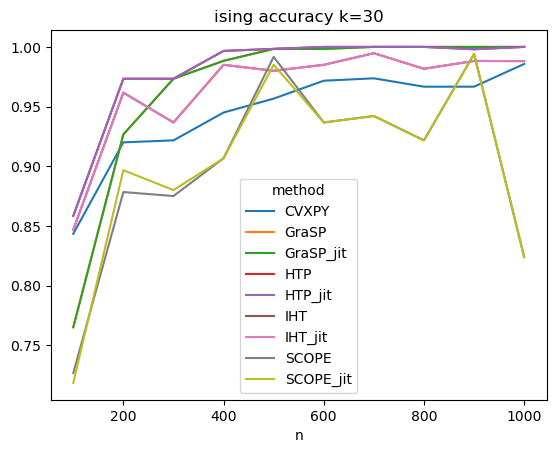

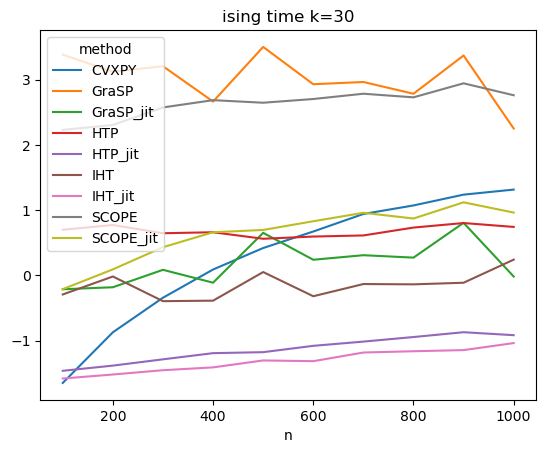

In [25]:
df_temp = df[(df['model'] == 'ising')]
for k in df_temp['k'].unique():
    df_temp_k = df_temp[df_temp['k'] == k]
    df_group = df_temp_k.groupby(['n', 'method'])['accuracy'].mean().unstack()
    df_group.plot(kind='line', title='ising accuracy k=' + str(k))
    df_group = df_temp_k.groupby(['n', 'method'])['time'].mean().apply(lambda x: np.log(x)).unstack()
    df_group.plot(kind='line', title='ising time k=' + str(k))

<Axes: title={'center': 'trend_filter time'}, xlabel='k'>

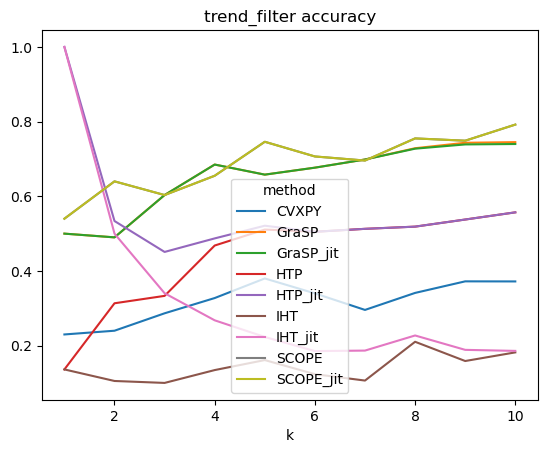

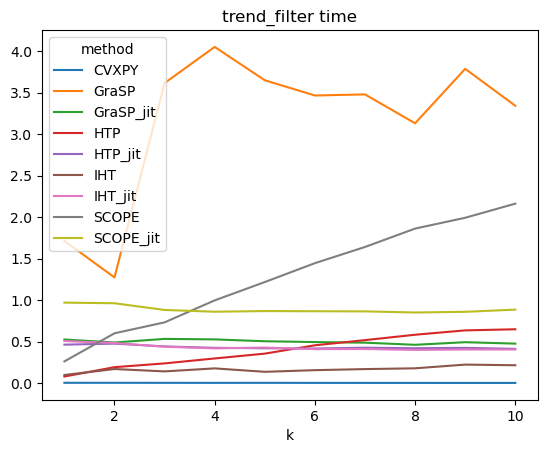

In [14]:
df_temp = df[(df['model'] == 'trend_filter')]
#df_temp['method'] = df_temp['method'].apply(lambda x: x.replace('_jit', ''))
df_group = df_temp.groupby(['k', 'method'])['accuracy'].mean().unstack()
df_group.plot(kind='line', title='trend_filter' + ' accuracy')

df_temp = df_temp.loc[df_temp['time'] < 100]
df_group = df_temp.groupby(['k', 'method'])['time'].mean().unstack()
df_group.plot(kind='line', title='trend_filter' + ' time')